# Algorithm:

### Phase 01: Data Collection and Preparation

1. Get dataset
2. Preprocess engineering

### Phase 02: Exploratory Data Analysis (EDA)

1. Trend analysis
2. Sector analysis
3. Geographical analysis
4. Demographic analysis

### Phase 03: Story Development & Vizualizations

1. Identify key narratives
2. Data visualizations

### Phase 04: Integration with OpenAI API   

1. Automated insights
2. Content generation


In [1]:
# import required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai import OpenAI
import os
import csv

In [3]:
# Check data types, row/column headers
# Check the csv delimeter types (\t or ; or ,) to specify the separation between data
# Pick the correct csv file for each task where relevant

In [2]:
# reference url: https://docs.python.org/3/library/csv.html
# check the csv delimeter:
def sniff_csv_delimiter(csv_file):
    with open(csv_file, newline='') as csv_file_to_sniff:
        try:
            dialect = csv.Sniffer().sniff(csv_file_to_sniff.read(1024))
            csv_file_to_sniff.seek(0)  # Return to the start of the file after reading
            return dialect.delimiter
        except csv.Error:
            print("Could not determine the delimiter. Please inspect the file manually.")

In [4]:
file_name = './datasets/Average_Hourly_Wages_Overall_Canadian.csv'
delimiter = sniff_csv_delimiter(file_name);
df = pd.read_csv(file_name, sep=delimiter)

# getting to know the data:
df.head()

,REF_DATE,GEO,DGUID,Wages,Type of work,National Occupational Classification (NOC),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,Current dollars,75,units,0,v1481406203,1.2.2.1.2.3,32.32,NaN,NaN,NaN,2
1,2019,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,Current dollars,75,units,0,v1481406203,1.2.2.1.2.3,33.13,NaN,NaN,NaN,2
2,2020,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,Current dollars,75,units,0,v1481406203,1.2.2.1.2.3,34.78,NaN,NaN,NaN,2
3,2021,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,Current dollars,75,units,0,v1481406203,1.2.2.1.2.3,35.66,NaN,NaN,NaN,2
4,2022,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Total employees, all occupations [00-95]",Males,25 to 54 years,Current dollars,75,units,0,v1481406203,1.2.2.1.2.3,37.38,NaN,NaN,NaN,2


In [5]:
# getting to know the data:
df.tail()

,REF_DATE,GEO,DGUID,Wages,Type of work,National Occupational Classification (NOC),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
703,2019,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Labourers in processing, manufacturing and uti...",Females,25 to 54 years,Current dollars,75,units,0,v1481406903,1.2.2.59.3.3,17.38,NaN,NaN,NaN,2
704,2020,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Labourers in processing, manufacturing and uti...",Females,25 to 54 years,Current dollars,75,units,0,v1481406903,1.2.2.59.3.3,17.36,NaN,NaN,NaN,2
705,2021,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Labourers in processing, manufacturing and uti...",Females,25 to 54 years,Current dollars,75,units,0,v1481406903,1.2.2.59.3.3,17.56,NaN,NaN,NaN,2
706,2022,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Labourers in processing, manufacturing and uti...",Females,25 to 54 years,Current dollars,75,units,0,v1481406903,1.2.2.59.3.3,18.93,NaN,NaN,NaN,2
707,2023,Canada,2016A000011124,Average hourly wage rate,Full-time employees,"Labourers in processing, manufacturing and uti...",Females,25 to 54 years,Current dollars,75,units,0,v1481406903,1.2.2.59.3.3,20.31,NaN,NaN,NaN,2


In [6]:
# checking the types:
df.dtypes

REF_DATE                                        int64
GEO                                            object
DGUID                                          object
Wages                                          object
Type of work                                   object
National Occupational Classification (NOC)     object
Sex                                            object
Age group                                      object
UOM                                            object
UOM_ID                                          int64
SCALAR_FACTOR                                  object
SCALAR_ID                                       int64
VECTOR                                         object
COORDINATE                                     object
VALUE                                         float64
STATUS                                        float64
SYMBOL                                        float64
TERMINATED                                    float64
DECIMALS                    

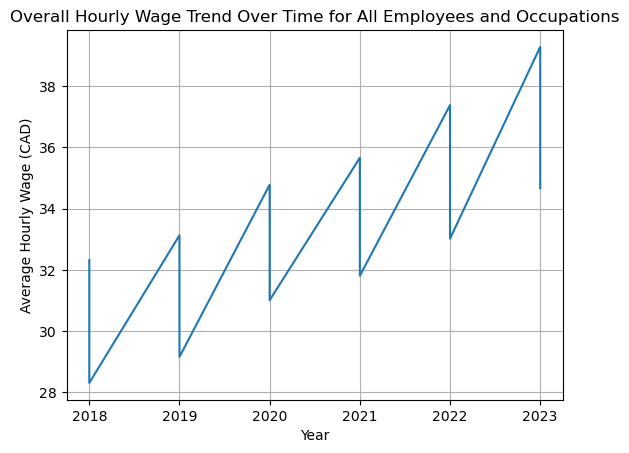

In [33]:
# Task: Create a line plot that shows the overall hourly wage trend over time
# filter the information I need:
overall_hourly_wages = df[df['National Occupational Classification (NOC)'] == 'Total employees, all occupations [00-95]']
overall_hourly_wages_sorted = overall_hourly_wages.sort_values('REF_DATE')

# preparing the plot:
fig, ax = plt.subplots()

ax.plot(overall_hourly_wages_sorted['REF_DATE'],overall_hourly_wages_sorted['VALUE'])
ax.set_title('Overall Hourly Wage Trend Over Time for All Employees and Occupations')
ax.set_xlabel('Year')
ax.set_ylabel('Average Hourly Wage (CAD)')
ax.grid()

plt.show()

In [8]:
# Compare the overall hourly wage trend (total employees) against health and engineering professionals



In [ ]:
# # filter the dataset for 'Total employees, all occupations' across all years, considering both sexes and all age groups
# df_overall_wages_all = df[df['National Occupational Classification (NOC)'].isin(['Professional occupations in engineering [213]', 'Professional occupations in health [31]', 'Total employees, all occupations [00-95]'])]

# # group by 'REF_DATE' to get the average hourly wage for all employees over the years
# df_average_wages_over_all_time = df_overall_wages_all.groupby('REF_DATE')['VALUE'].mean().reset_index()

# # preparing the plot:
# fig, ax = plt.subplots()

# ax.plot(df_average_wages_over_all_time['REF_DATE'],df_average_wages_over_all_time['VALUE'])

# ax.set_title('Overall Hourly Wage Trend Over Time for All Employees (Both Sexes, 15 Years and Over)')
# ax.set_xlabel('Avera')
# ax.set_ylabel('Average Hourly Wage (CAD)')
# ax.grid(True)

# plt.tight_layout()
# plt.show()

# # compare the overall hourly wage trend (total employees) against health and engineering professionals
# df_overall_eng_health_all = df[df['National Occupational Classification (NOC)'].isin([
#     'Professional occupations in engineering [213]', 
#     'Professional occupations in health [31]', 
#     'Total employees, all occupations [00-95]'
# ])]

# # group by 'REF_DATE':
# df_average_wages_over_all_time = df_overall_eng_health_all.groupby('REF_DATE')['VALUE'].mean().reset_index()

# # preparing the plot:
# fig, ax = plt.subplots()

# ax.plot(df_average_wages_over_all_time['REF_DATE'],df_average_wages_over_all_time['VALUE'])

# ax.set_title('Overall Hourly Wage Trend Over Time for All Employees (Both Sexes, 15 Years and Over)')
# ax.set_xlabel('Avera')
# ax.set_ylabel('Average Hourly Wage (CAD)')
# ax.grid(True)

# plt.tight_layout()
# plt.show()